# Análisis Exploratorio de Datos

## Importar librerías

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2
import utils

sns.set_style("white")
import warnings
warnings.simplefilter("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Carga de los datos limpios

In [104]:
archivo = 'BBDD_Hospitalizacion_limpio.csv'
df = pd.read_csv(archivo)
print(f'Se cargaron los datos del archivo {archivo}')

Se cargaron los datos del archivo BBDD_Hospitalizacion_limpio.csv


## Exploración inicial

In [105]:
df

,edad,diabetes,hospitaliz_ult_mes,psa,biopsias_prev,vol_prostatico,antibiotico_en_profilaxis,nro_muestras,cup,epoc,biopsia,nro_dias_con_infecc,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc
0,53,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2,0
1,56,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
2,57,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"R AMPI, R GENTA, R SULFA",SI,4,3
3,56,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
4,55,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,55,NO,NO,5.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 7,0,NO,NO,NO,NO,NO,NO,0,0
429,70,SI,NO,18.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,0,NO,NO,NO,NO,NO,NO,0,0
430,75,NO,NO,75.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 8,0,NO,NO,NO,NO,NO,NO,0,0
431,67,NO,NO,6.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 6,0,NO,NO,NO,NO,NO,NO,0,0


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   edad                       433 non-null    int64  
 1   diabetes                   433 non-null    object 
 2   hospitaliz_ult_mes         433 non-null    object 
 3   psa                        433 non-null    float64
 4   biopsias_prev              433 non-null    object 
 5   vol_prostatico             433 non-null    object 
 6   antibiotico_en_profilaxis  433 non-null    object 
 7   nro_muestras               433 non-null    int64  
 8   cup                        433 non-null    object 
 9   epoc                       433 non-null    object 
 10  biopsia                    433 non-null    object 
 11  nro_dias_con_infecc        433 non-null    int64  
 12  fiebre                     433 non-null    object 
 13  itu                        433 non-null    object 

In [107]:
df.describe(include='object')

,diabetes,hospitaliz_ult_mes,biopsias_prev,vol_prostatico,antibiotico_en_profilaxis,cup,epoc,biopsia,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion
count,433,433,433,433,433,433,433,433,433,433,433,433,433,433
unique,2,2,2,2,4,2,2,9,2,2,4,3,5,2
top,NO,NO,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,NO,NO,NO,NO,NO,NO
freq,381,429,389,307,345,430,419,213,397,427,425,425,426,410


# Variables numéricas

Se observan el resumen estadístico para las variables numéricas y a continuación se visualizan las distribuciones de cada una de las columnas.

In [108]:
df.describe()

,edad,psa,nro_muestras,nro_dias_con_infecc,dias_hosp_mq,dias_hosp_upc
count,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000
mean,64.230947,14.257875,12.907621,0.168591,0.210162,0.018476
std,9.977162,17.422817,4.000088,0.845321,1.084268,0.224908
min,39.000000,0.600000,4.000000,0.000000,0.000000,0.000000
25%,59.000000,5.700000,12.000000,0.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000,0.000000
75%,69.000000,16.000000,12.000000,0.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,9.000000,12.000000,3.000000


VISUALIZACIÓN PARA EDAD


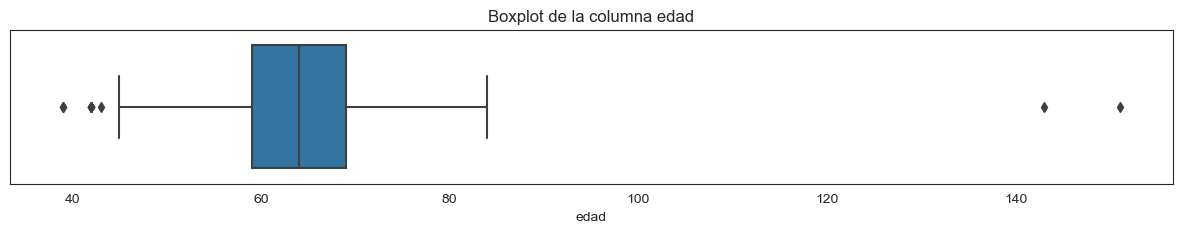

VISUALIZACIÓN PARA PSA


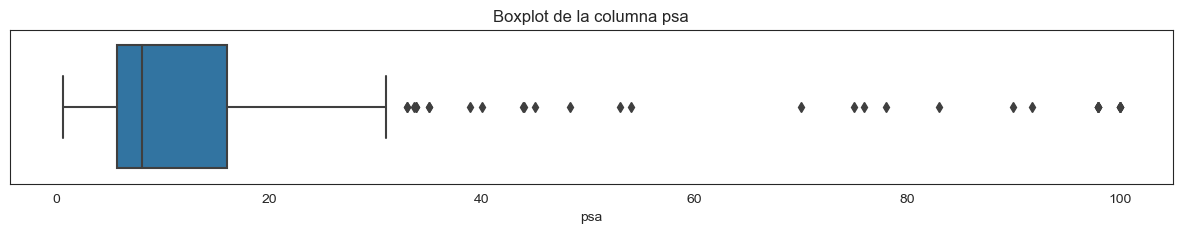

El bigote superior se ubica en: 31.45
Hay 31 valores atípicos.

VISUALIZACIÓN PARA NÚMERO DE MUESTRAS


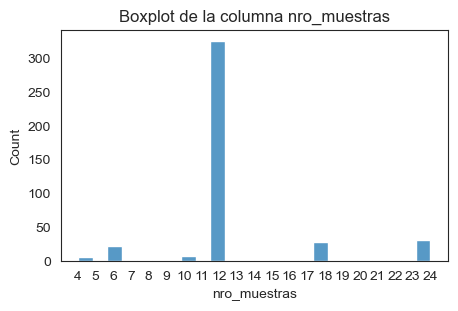

Valor mas frecuente es 12, con una cantidad de 325 y representa el 75.06%.

VISUALIZACIÓN PARA NÚMERO DE DÍAS CON INFECCIONES


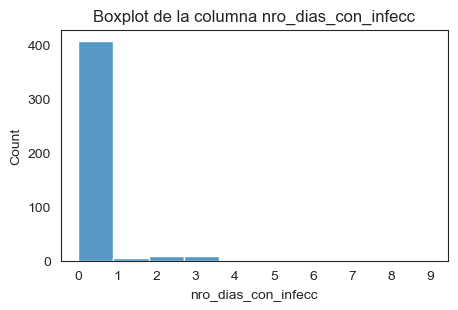

Valor mas frecuente es 0, con una cantidad de 408 y representa el 94.23%.
Hay 25 que presentaron complicaciones post la biopsia.

VISUALIZACIÓN PARA NÚMERO DE DÍAS DE HOSPITALIZACIÓN MEDICO QUIRURGICO


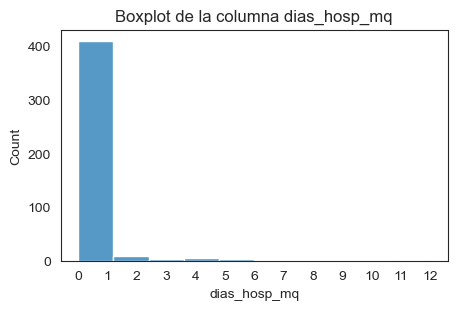

Valor mas frecuente es 0, con una cantidad de 410 y representa el 94.69%.

VISUALIZACIÓN PARA NÚMERO DE DÍAS DE HOSPITALIZACIÓN EN ESTADO CRÍTICO


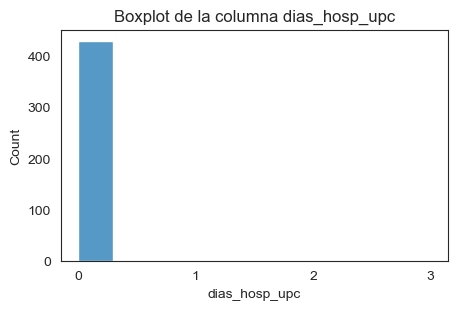

Valor mas frecuente es 0, con una cantidad de 430 y representa el 99.31%.


In [109]:
print('VISUALIZACIÓN PARA EDAD')
utils.boxplot(df, 'edad')

print('VISUALIZACIÓN PARA PSA')
utils.boxplot(df,'psa')
# Se calcula cual es el límite del bigote máximo
utils.bigote_max(df['psa'])

print('\nVISUALIZACIÓN PARA NÚMERO DE MUESTRAS')
utils.histplot(df, 'nro_muestras', bins=24)
# Se calcula el porcentaje del valor mas frecuente para esta variable
utils.valor_mas_frecuente(df, 'nro_muestras')

print('\nVISUALIZACIÓN PARA NÚMERO DE DÍAS CON INFECCIONES')
utils.histplot(df, 'nro_dias_con_infecc')
# Se calcula el porcentaje del valor mas frecuente para esta variable
utils.valor_mas_frecuente(df, 'nro_dias_con_infecc')
# Se analizan cuantos pacientes sí tienen complicaciones
con_complicaciones = (df['nro_dias_con_infecc'] > 0)
print(f'Hay {con_complicaciones.sum()} que presentaron complicaciones post la biopsia.')

print('\nVISUALIZACIÓN PARA NÚMERO DE DÍAS DE HOSPITALIZACIÓN MEDICO QUIRURGICO')
utils.histplot(df, 'dias_hosp_mq')
# Se calcula el porcentaje del valor mas frecuente para esta variable
utils.valor_mas_frecuente(df, 'dias_hosp_mq')

print('\nVISUALIZACIÓN PARA NÚMERO DE DÍAS DE HOSPITALIZACIÓN EN ESTADO CRÍTICO')
utils.histplot(df, 'dias_hosp_upc')
# Se calcula el porcentaje del valor mas frecuente para esta variable
utils.valor_mas_frecuente(df, 'dias_hosp_upc')

La variable *edad* presenta claramente dos valores atípicos que pueden observarse en el boxplot, donde tales pacientes tendrían mas de 140 años, por lo tanto esos datos se decide borrarlos y recalcular las estadísticas.

Cantidad de valores mayores a 100 años: 0


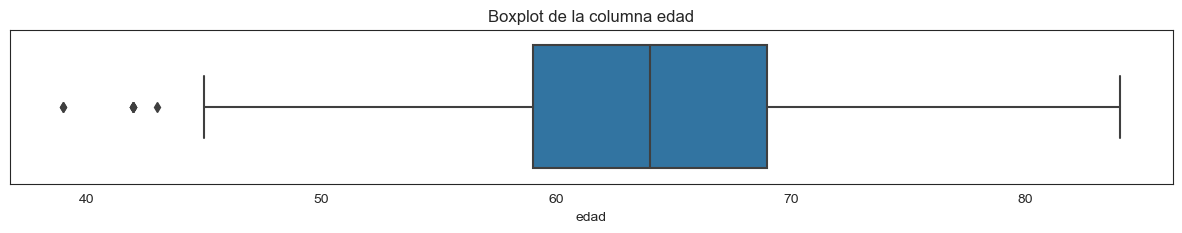

ESTADÍSTICAS DE LA COLUMNA EDAD LIMPIA
count    431.000000
mean      63.846868
std        8.241400
min       39.000000
25%       59.000000
50%       64.000000
75%       69.000000
max       84.000000
Name: edad, dtype: float64


In [110]:
# Se eliminan registros y se verifica su eliminación
df = df[df['edad'] <= 100]
print('Cantidad de valores mayores a 100 años:', (df['edad'] > 100).sum())

# Se revisa nuevamente el boxplot
utils.boxplot(df, 'edad')

#Estadísticas de la columna
print('ESTADÍSTICAS DE LA COLUMNA EDAD LIMPIA')
print(df['edad'].describe())

De esta manera, para la variebla **edad** se puede ver que el 75% de las edades se encuentra entre los 39 y 69 años de edad, con una edad promedio de cerca de 64 años. Hay pacientes con mayor edad, llegando a los 84 años. Se aprecian tres casos de pacientes con edades atípicas por debajo de los 45 años.

Para simplificar la interpretación de las relaciones entre las variables, se decide categorizar esta variable como:

    - menor de 65 años
    - mayor o igual de 65 años

In [113]:
df['edad'] = df['edad'].apply(utils.convertir_si_no_edad)
df['edad'].value_counts()

menor_65    223
mayor_65    208
Name: edad, dtype: int64

En cuanto a la variable **psa** se aprecia en la visualización que el 75% de los registros tienen concentraciones por debajo de los 16 ng/ml. Por otra parte, hay 31 pacientes que se ubican en por encima de los 31,45 ng/ml considerados estadísticamente atípicos. Si bien la bibliografía consultada no determina valores máximos para esta concentración pero sí indica que es posible hallar valores altos en situaciones específicas, entonces se decide dejarlos en el conjunto de datos.

Se decide categorizar esta variable en:

    - menor o igual a 4 ng/ml (teniendo en cuenta que en general este límite es para pruebas normales)
    - entre 4 y 31 ng/ml
    - mayor o igual a 31 ng/ml

In [114]:
df['psa'] = df['psa'].apply(utils.convertir_si_no_psa)
df['psa'].value_counts()

entre_4_31    365
menor_4        34
mayor_31       32
Name: psa, dtype: int64

La variable **nro_muestras** indica la cantidad de muestras que son tomadas al momento de la biopsia y se puede ver que se pareciera ser práctica común tomar 12 muestras dado que representan casi el 75% de los casos registrados. En algunos se llegaron a tomar 18 y 24 muestras.

Para categorizar esta variable se decide por el siguiente criterio:

    - menor de 10 muestras
    - entre 10 y 15 muestras (para encuadrar en esta categoría los casos de 12 muestras)
    - mas de 20 muestras

In [115]:
df['nro_muestras'] = df['nro_muestras'].apply(utils.convertir_si_no_muestras)
df['nro_muestras'].value_counts()

entre_10_15    325
mayor_20        67
menor_10        39
Name: nro_muestras, dtype: int64

En relación con los **nro_dias_con_infecc** se ve que el 94.2% de los pacientes presentaron 0 días, por lo tanto se considera que no tuvieron infección. Por otra parte, 25 pacientes presentaron infección desde 1 a 3 días luego de la intervención. Para categorizar esta variable se decidió por clasificar como 'SI' a los pacientes que presentaron infección desde 1 día o mas y como 'NO' a los que presentaron 0 días.

In [111]:
df['nro_dias_con_infecc'] = df['nro_dias_con_infecc'].apply(utils.convertir_si_no_infecc)
df['nro_dias_con_infecc'].value_counts()

NO    406
SI     25
Name: nro_dias_con_infecc, dtype: int64

En cuanto a las variables **dias_hosp_mq** y **dias_hosp_ipc** se observan que son variables con 94.66% y 99.3% de valores 0, es decir, que el paciente no fue hospitalizado ni por razones médico quirúrgicas ni en estado crítico. Por lo tanto, se decide eliminar estas columnas del conjuto de datos.

In [116]:
columnas_a_eliminar = ['dias_hosp_mq','dias_hosp_upc']
df = df.drop(columns=columnas_a_eliminar)
df.columns

Index(['edad', 'diabetes', 'hospitaliz_ult_mes', 'psa', 'biopsias_prev',
       'vol_prostatico', 'antibiotico_en_profilaxis', 'nro_muestras', 'cup',
       'epoc', 'biopsia', 'nro_dias_con_infecc', 'fiebre', 'itu',
       'tipo_cultivo', 'agente_aislado', 'patron_resistencia',
       'hospitalizacion'],
      dtype='object')

## Variables categóricas

A continuación, se visualiza la distribución de cada una de las variables categóricas.

VISUALIZACIÓN DE LA VARIABLE edad


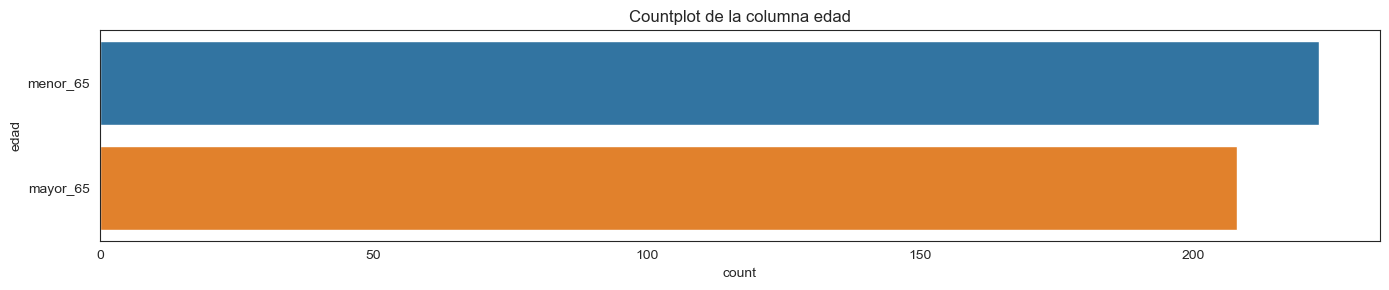

VISUALIZACIÓN DE LA VARIABLE diabetes


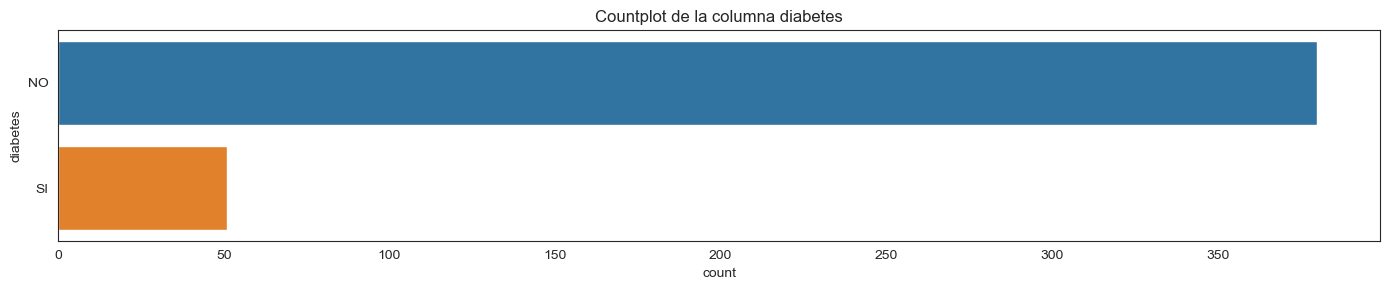

VISUALIZACIÓN DE LA VARIABLE hospitaliz_ult_mes


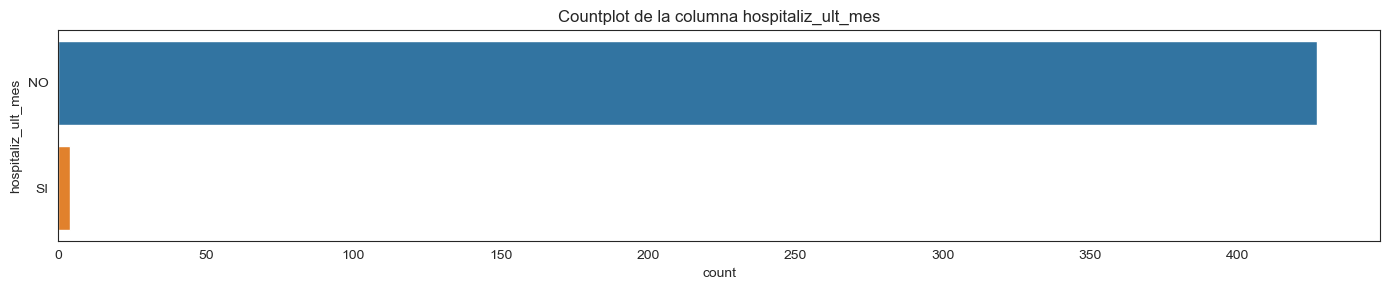

VISUALIZACIÓN DE LA VARIABLE psa


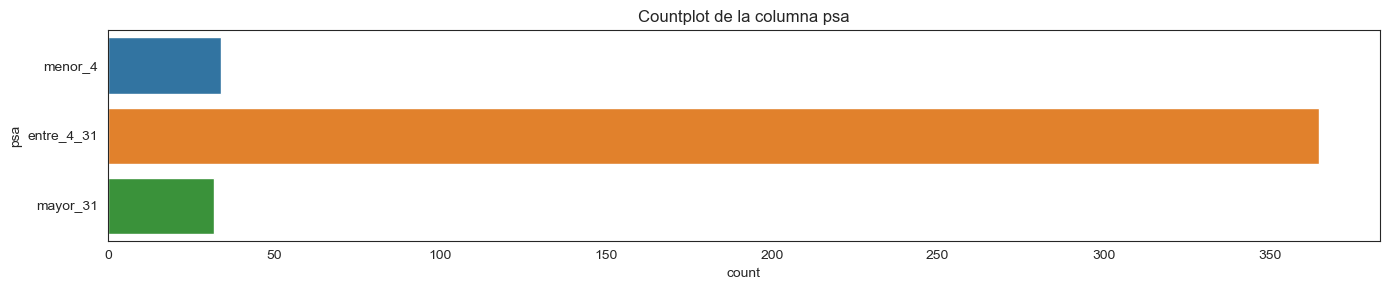

VISUALIZACIÓN DE LA VARIABLE biopsias_prev


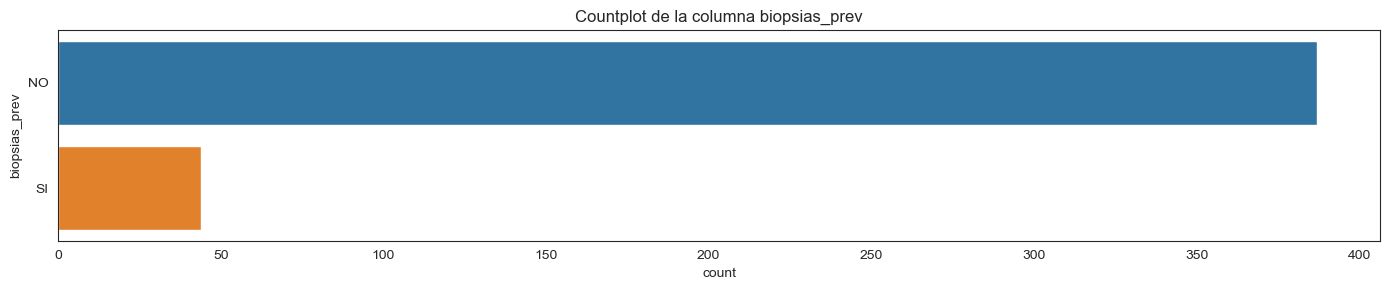

VISUALIZACIÓN DE LA VARIABLE vol_prostatico


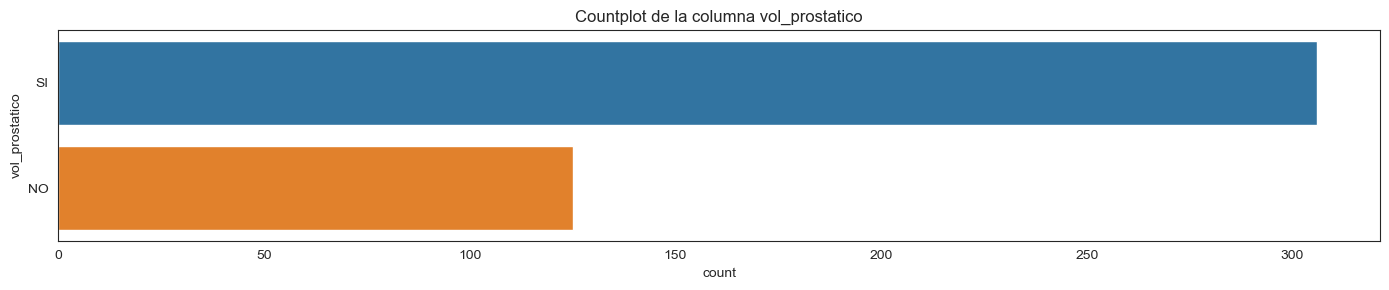

VISUALIZACIÓN DE LA VARIABLE antibiotico_en_profilaxis


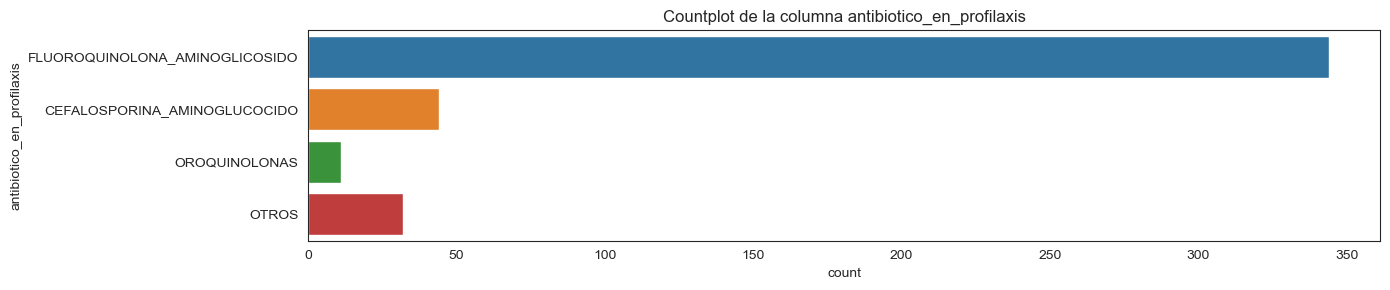

VISUALIZACIÓN DE LA VARIABLE nro_muestras


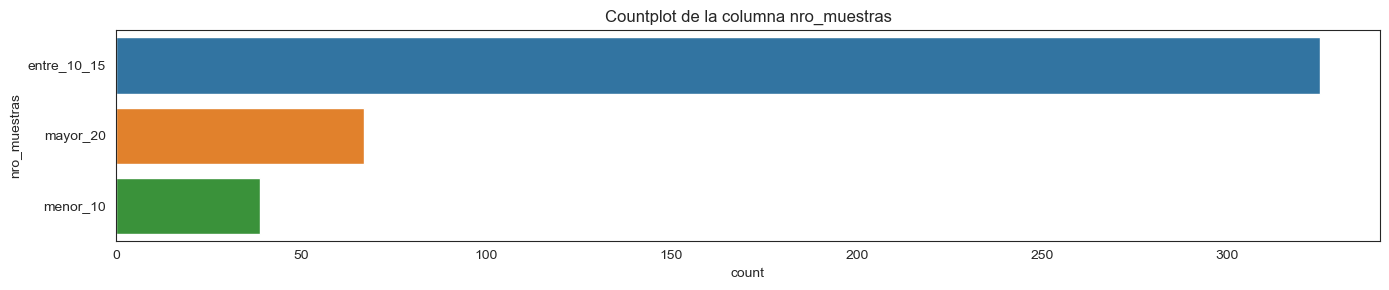

VISUALIZACIÓN DE LA VARIABLE cup


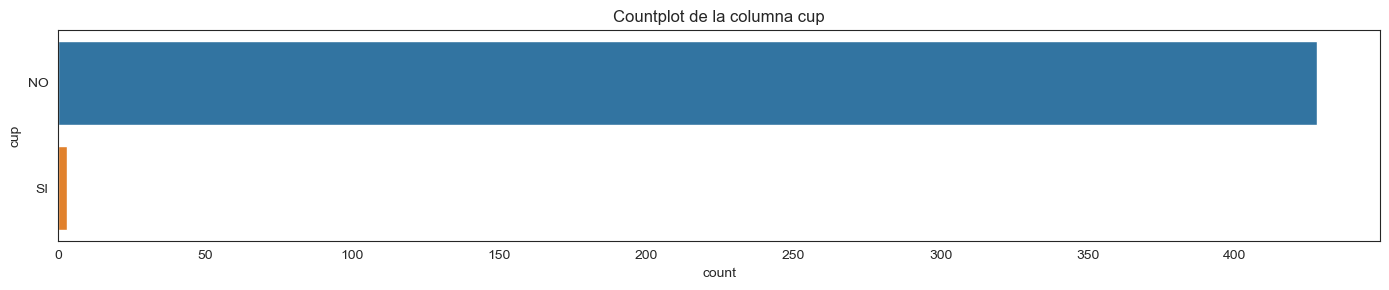

VISUALIZACIÓN DE LA VARIABLE epoc


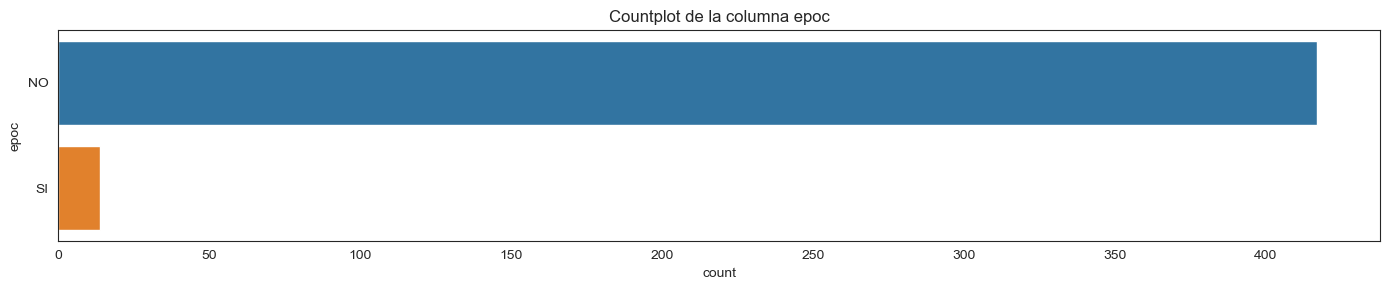

VISUALIZACIÓN DE LA VARIABLE biopsia


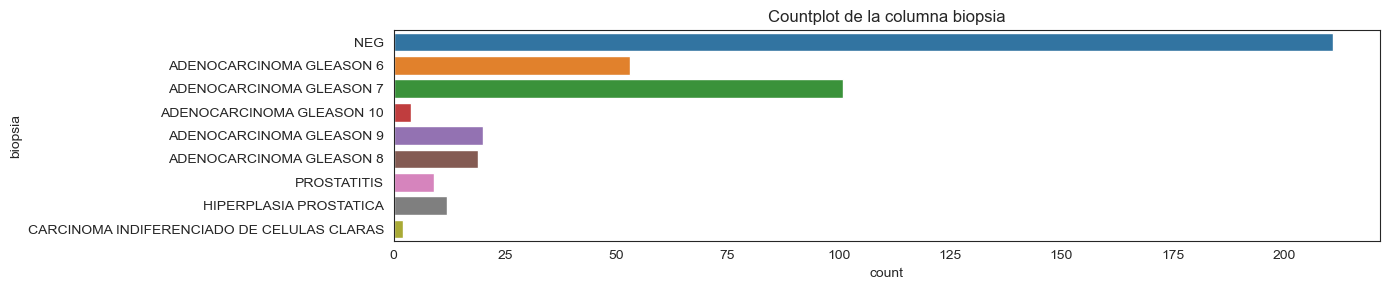

VISUALIZACIÓN DE LA VARIABLE nro_dias_con_infecc


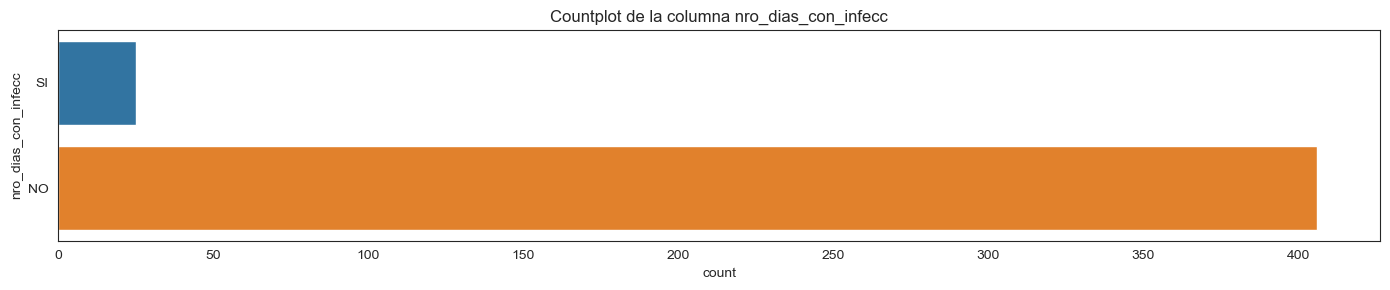

VISUALIZACIÓN DE LA VARIABLE fiebre


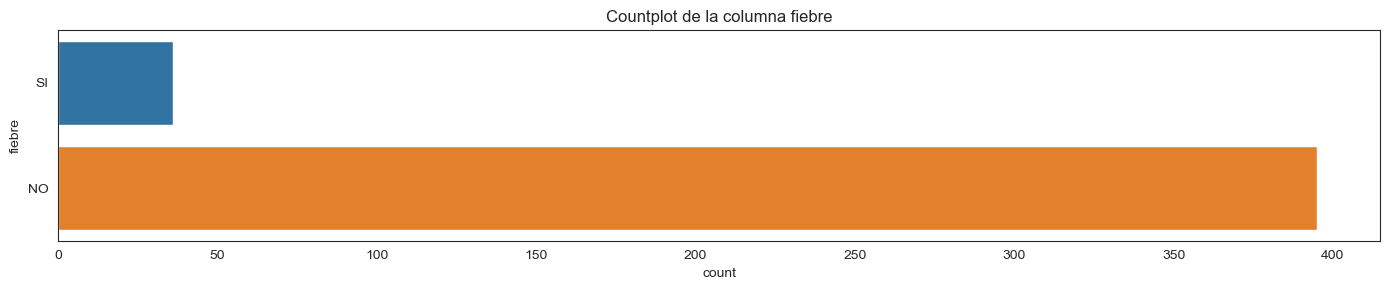

VISUALIZACIÓN DE LA VARIABLE itu


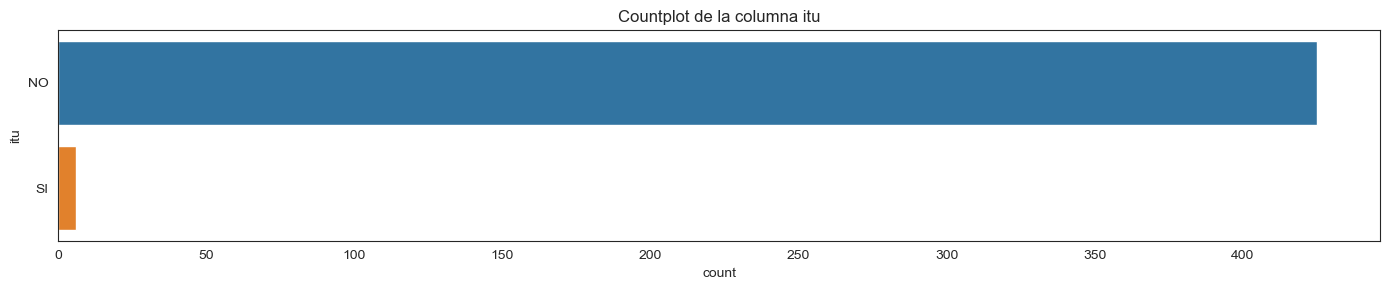

VISUALIZACIÓN DE LA VARIABLE tipo_cultivo


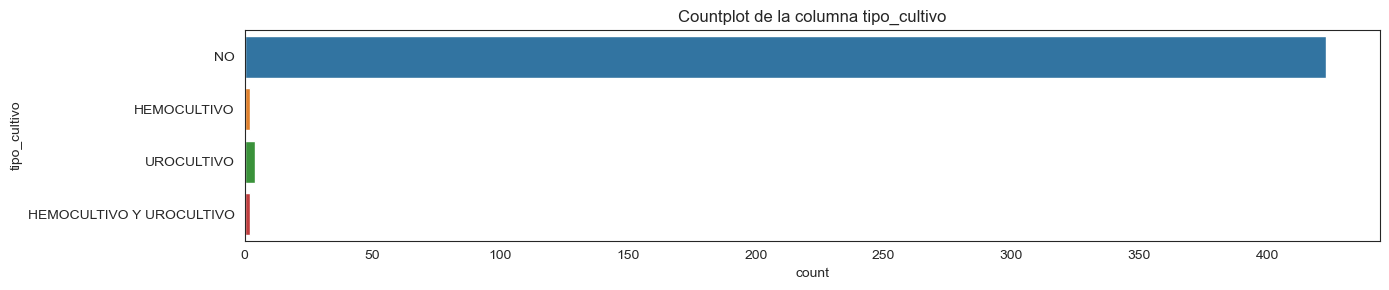

VISUALIZACIÓN DE LA VARIABLE agente_aislado


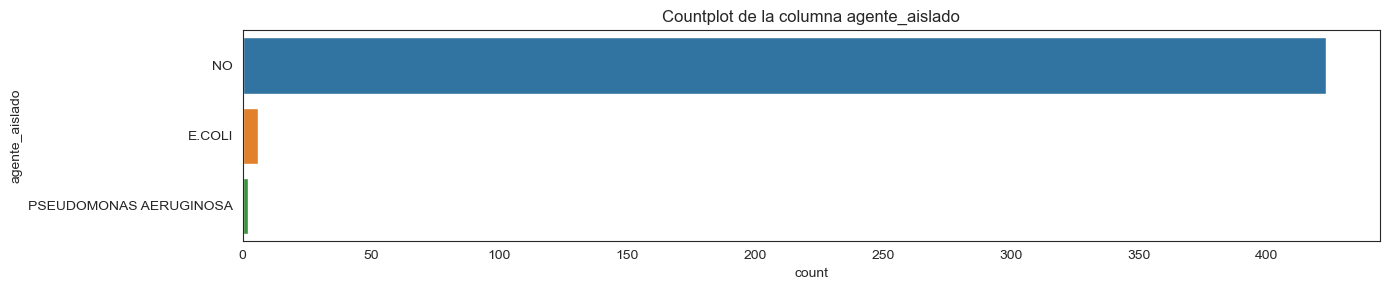

VISUALIZACIÓN DE LA VARIABLE patron_resistencia


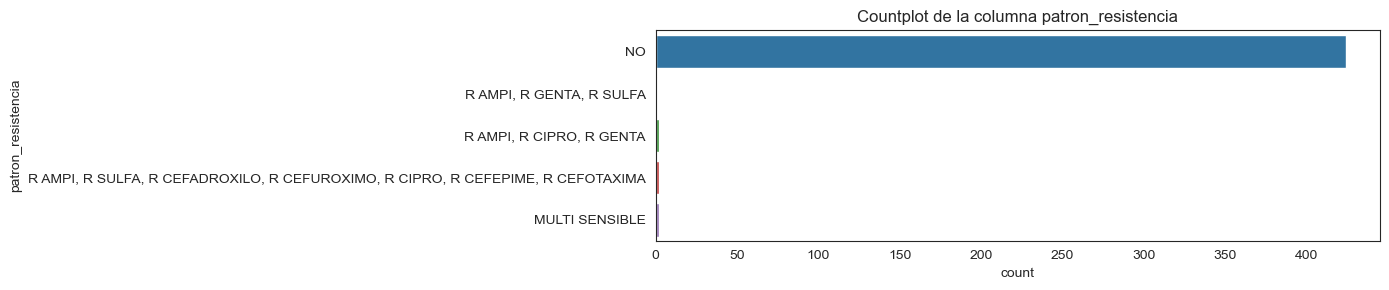

VISUALIZACIÓN DE LA VARIABLE hospitalizacion


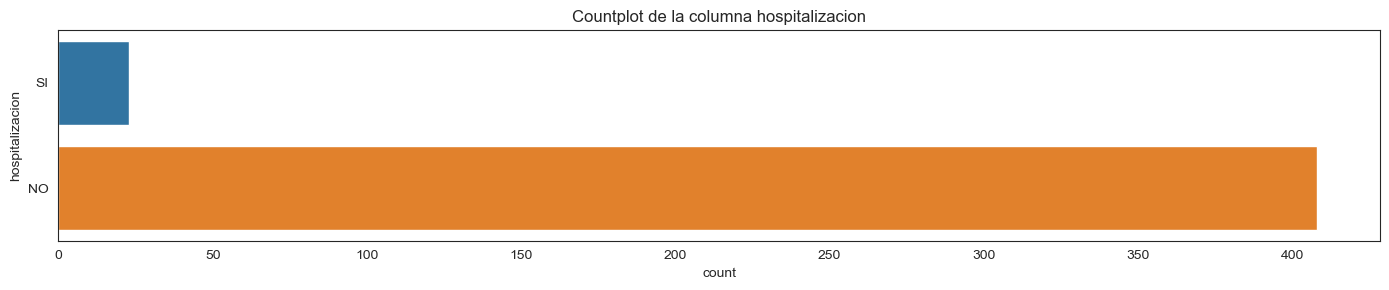

In [117]:
columnas = df.columns
for c in columnas:
    print(f'VISUALIZACIÓN DE LA VARIABLE {c}')
    utils.countplot(df, c)

Algunas lecturas de las visualizaciones previas son:

* **edad** una vez categorizada queda aproximadamente distribuida igual entre las dos categorías elegidas.
* **diabetes**, **hospitaliz_ult_mes**, **biopsias_prev**, **cup**, **epoc**, **nro_dias_con_infeccion**, **fiebre**, **itu** y **hospitalizacion** clasifican la mayor cantidad de pacientes en la categoría de "NO".
* **vol_prostatico**
* **psa** queda con mayoy cantidad de pacientes en el rango de 4 a 31 ng/ml.
* **antibiotico_en_profilaxis** tiene un alto porcentaje en la categoría fluoroquinolona_aminoglicosido.
* **nro_muestras**, como era de esperarse, presenta la mayor cantidad de paciente en el rango de 10 a 15 muestras.
* **biopsia** tiene varias categorías con diferentes cantidades en cada una, es una de las variables con mayor diversidad de informacion. La mayor proporción de pacientes se clasifican en NEG (resultado negativo).
* **tipo_cultivo** tiene un mayor porcentaje de pacientes con "NO", dado que no se realizaron cultivos, pero además presentan otras tres categorías (hemocultivo, urocultivo, hemocultivo y urocultivo) que podrían agruparse en una sola que puede ser 'SI' para describir que se solicitó algún tipo de cultivo. Por otro lado, **agente_aislado** es similar al anterior, donde mayormente es "NO" dado que no se pidió cultivo o que, si se pidió, no se aisló ningún agente. Pero a su vez tiene otras dos categorías con muy pocos pacientes donde el agente ailado es E. Coli o Pseudomonas aeruginosa.
* **patron_resistencia** tiene mayormente pacientes 'NO' que significa que no tienen ninguna resistencia a antibióticos, pero luego aparecen cuatro categorías mas con muy pocos pacientes en cada una con alguna combinación o grupo de antibióticos para los cuales desarrollan resistencia.

En el siguiente heatmap para evaluar si algunas de las variables es constante, adoptándose para este análisis como constante aquellas variables donde una de sus categorías supere el 98%. 

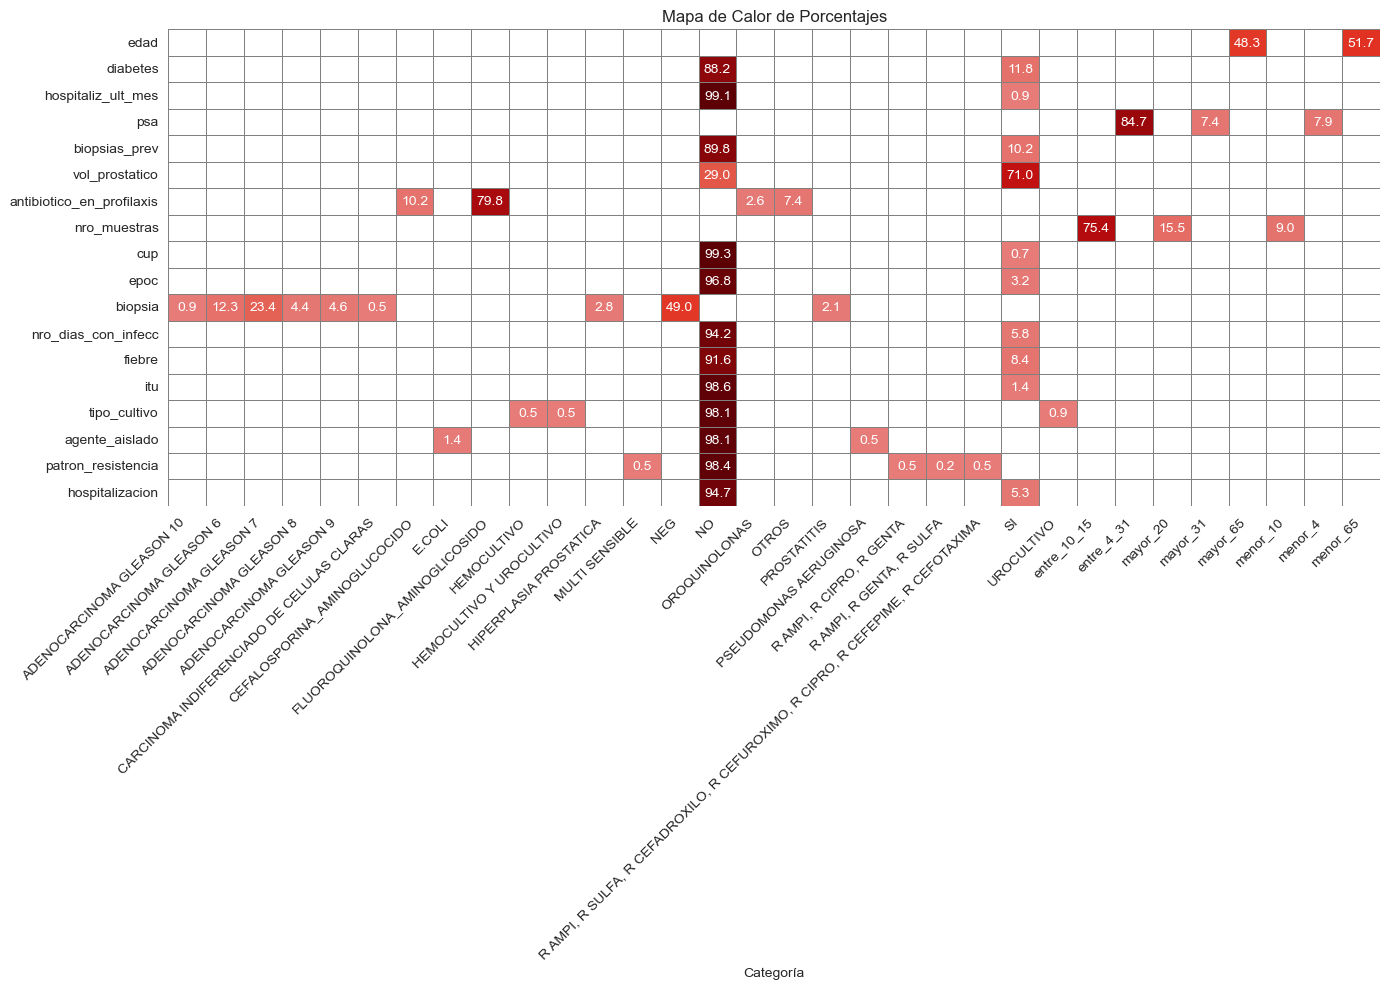

In [122]:
utils.heatmap_categoricas(df)    

De este heatmap se identifican a **hospitaliz_ult_mes**, **cup**, **itu**, **tipo_cultivo**, **agente_aislado** y **patron_resistencia** como variables donde el 98% de los datos es una sola categoría, en todos los caso 'NO', por lo que se decide borrarlos del conjunto de datos.

In [124]:
columnas_a_eliminar = ['hospitaliz_ult_mes', 'cup', 'itu', 'tipo_cultivo', 'agente_aislado', 'patron_resistencia']
df = df.drop(columns=columnas_a_eliminar)
df.columns

Index(['edad', 'diabetes', 'psa', 'biopsias_prev', 'vol_prostatico',
       'antibiotico_en_profilaxis', 'nro_muestras', 'epoc', 'biopsia',
       'nro_dias_con_infecc', 'fiebre', 'hospitalizacion'],
      dtype='object')

## Codificación del dataset

Una ver realizada la limpieza de los datos y el análisis exploratorio, se procede al procesamiento del conjunto de datos de manera que puedan ser interpretados por los modelos de Machine Learning. Se realizará el procesamiento sobre todas las variables y en particular se seleccionarán las variables a utilizar en el modelo.

In [127]:
encoded_df = utils.label_encode_categoricals(df)
encoded_df

,edad,diabetes,psa,biopsias_prev,vol_prostatico,antibiotico_en_profilaxis,nro_muestras,epoc,biopsia,nro_dias_con_infecc,fiebre,hospitalizacion
0,1,0,2,0,1,1,0,0,7,1,1,1
1,1,0,0,0,1,1,0,0,7,1,1,1
2,1,0,0,1,1,1,1,0,7,1,1,1
3,1,0,0,0,1,1,0,0,7,1,1,1
4,1,0,0,1,1,1,1,0,7,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
428,1,0,0,0,0,1,0,0,2,0,0,0
429,0,1,0,0,1,1,0,0,7,0,0,0
430,0,0,1,0,1,1,0,0,3,0,0,0
431,0,0,0,0,1,1,0,0,1,0,0,0


# Carga de los datos transformados y codificados

Se guarda el dataframe que resultó del análisis exploratorio y el que resulta de codificar las columnas categóricas.

In [128]:
df_analizado = 'BBDD_hospitalizacion_analizado.csv'
df_codificado = 'BBDD_hospitalizacion_codificado.csv'

df.to_csv(df_analizado, index=False, encoding='utf-8')
print(f'Se guardó el archivo {df_analizado}')
encoded_df.to_csv(df_codificado, index=False, encoding='utf-8')
print(f'Se guardó el archivo {df_codificado}')

Se guardó el archivo BBDD_hospitalizacion_analizado.csv
Se guardó el archivo BBDD_hospitalizacion_codificado.csv
